# Problem Statement: Can we predict the fuel type using a Classification Model ?

# 1. EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
from google.colab import drive
# Assuming the file is named 'EnergyStorage_April2024.xlsx' and is in the current directory
file_path = 'EnergyStorage_April2024.xlsx' dhrdhtd

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

In [ ]:
df

,Utility,Nameplate Capacity (in KW AC),Fuel Type,Facility City,County,CAISO Flag,Facility Zip,Customer Sector,Approval Date
0,Pacific Gas & Electric,4.85,Electric Grid_ Solar,Acampo,San Joaquin,OTHER,95220,Residential,2017-07-11
1,San Diego Gas & Electric,5.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-04-15
2,San Diego Gas & Electric,10.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-04-15
3,San Diego Gas & Electric,15.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-04-18
4,San Diego Gas & Electric,9.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-04-19
...,...,...,...,...,...,...,...,...,...
154208,Sacramento Municipal Utility District,1.28,Battery,Sacramento,Sacramento,OTHER,95821,Residential,2023-12-19
154209,Sacramento Municipal Utility District,1.04,Battery,Folsom,Sacramento,OTHER,95630,Residential,2018-03-08
154210,Sacramento Municipal Utility District,0.54,Battery,Folsom,Sacramento,OTHER,95630,Residential,2022-09-30
154211,Sacramento Municipal Utility District,0.27,Battery,Rancho Cordova,Sacramento,OTHER,95670,Residential,2019-05-17


### Initial Data Exploration


In [ ]:
df.head()

,Utility,Nameplate Capacity (in KW AC),Fuel Type,Facility City,County,CAISO Flag,Facility Zip,Customer Sector,Approval Date
0,Pacific Gas & Electric,4.85,Electric Grid_ Solar,Acampo,San Joaquin,OTHER,95220,Residential,2017-07-11
1,San Diego Gas & Electric,5.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-04-15
2,San Diego Gas & Electric,10.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-04-15
3,San Diego Gas & Electric,15.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-04-18
4,San Diego Gas & Electric,9.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-04-19


In [ ]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Utility,Nameplate Capacity (in KW AC),Fuel Type,Facility City,County,CAISO Flag,Facility Zip,Customer Sector,Approval Date
9,San Diego Gas & Electric,15.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-05-12
21,San Diego Gas & Electric,10.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-07-05
55,San Diego Gas & Electric,15.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2022-12-15
58,San Diego Gas & Electric,10.00,Battery,Alpine,San Diego,OTHER,91901,Residential,2023-01-12
116,Pacific Gas & Electric,2.56,Onsite Renewable_ Solar,Castro Valley,Alameda,OTHER,94552,Residential,2023-06-20
...,...,...,...,...,...,...,...,...,...
153968,Sacramento Municipal Utility District,5.00,Battery,Elk Grove,Sacramento,OTHER,95757,Residential,2023-01-31
153978,Sacramento Municipal Utility District,5.00,Battery,Folsom,Sacramento,OTHER,95630,Residential,2023-05-23
153987,Sacramento Municipal Utility District,5.00,Battery,Folsom,Sacramento,OTHER,95630,Residential,2023-05-04
154056,Sacramento Municipal Utility District,5.00,Battery,Sacramento,Sacramento,OTHER,95822,Residential,2023-12-19


Identifying different column types:

In [ ]:
df.dtypes


,0
Utility,object
Nameplate Capacity (in KW AC),float64
Fuel Type,object
Facility City,object
County,object
CAISO Flag,object
Facility Zip,int64
Customer Sector,object
Approval Date,datetime64[ns]


Outlier detection for NamePlateRating - We find nothing revealing a specific discrepancy within the data

250000.0


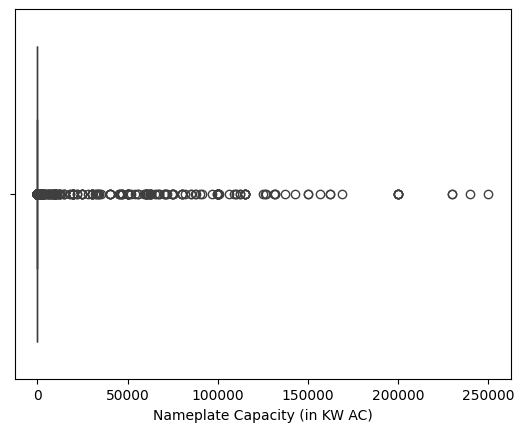

In [ ]:
sns.boxplot(x=df['Nameplate Capacity (in KW AC)'].astype(float))
print(df['Nameplate Capacity (in KW AC)'].astype(float).max())


IQ Range:

In [ ]:
Q1 = df['Nameplate Capacity (in KW AC)'].quantile(0.25)
Q3 = df['Nameplate Capacity (in KW AC)'].quantile(0.75)
IQR = Q3 - Q1

IQR

5.0

Finding unique values - 43 fuel types

In [ ]:
df['Fuel Type'].nunique()

43

Standard Deviation

In [ ]:
median_volt_fuel_type = df.groupby(['Fuel Type'])['Nameplate Capacity (in KW AC)'].median()

In [ ]:
df['Nameplate Capacity (in KW AC)'].std()

2942.4482426643676

In [ ]:
from scipy.stats import kurtosis, skew
print(skew(df['Nameplate Capacity (in KW AC)'], bias=False))
print(kurtosis(df['Nameplate Capacity (in KW AC)'], bias=False))

48.08888423909319
2760.73489443186


Difference in NamePlate Capacity by Fuel Type:

In [ ]:
import plotly.graph_objects as go

# Get the median 'Nameplate Capacity (in KW AC)' for each 'Fuel Type'
median_capacity = df.groupby('Fuel Type')['Nameplate Capacity (in KW AC)'].median()

# Sort 'Fuel Type' by median capacity in descending order
sorted_fuel_types = median_capacity.sort_values(ascending=False).index

# Initialize a list to hold box plots
box_plots = []

# Add a box plot for all data
box_plots.append(
    go.Box(
        y=df['Nameplate Capacity (in KW AC)'],
        name='All Data',
        boxpoints='outliers',
        marker=dict(color='grey'),
        opacity=0.5
    )
)

# Add box plots for each fuel type
for fuel_type in sorted_fuel_types:
    box_plots.append(
        go.Box(
            y=df[df['Fuel Type'] == fuel_type]['Nameplate Capacity (in KW AC)'],
            name=fuel_type,
            boxpoints='outliers'
        )
    )

# Create the figure
fig = go.Figure(data=box_plots)

# Update layout with appropriate titles
fig.update_layout(
    title="Box plots of Nameplate Capacity by Fuel Type",
    xaxis_title="Fuel Type",
    yaxis_title="Nameplate Capacity (in KW AC)",
    xaxis=dict(tickangle=45),
    yaxis=dict(type="log")
)

# Show the figure
fig.show()


In [ ]:
# Get the counts for each Fuel Type
fuel_type_counts = df['Fuel Type'].value_counts()

# Filter for classes with at least 400 records
selected_fuel_types = fuel_type_counts[fuel_type_counts >= 400].index

# Filter the DataFrame to include only these Fuel Types
df = df[df['Fuel Type'].isin(selected_fuel_types)]

# Display the result
df['Fuel Type'].value_counts()


,count
Fuel Type,
Battery,72839
Onsite Renewable_ Solar,42724
Electric Grid_ Solar,26853
Solar PV,8691
Electric Grid,1075
Solar PV & Battery,689
Electric Grid_ Onsite Renewable_ Solar,493


The median name plate capacity between fuel type groups has little variability

In [ ]:
import plotly.graph_objects as go

# Get the median 'Nameplate Capacity (in KW AC)' for each 'Fuel Type'
median_capacity = df.groupby('Fuel Type')['Nameplate Capacity (in KW AC)'].median()

# Sort 'Fuel Type' by median capacity in descending order
sorted_fuel_types = median_capacity.sort_values(ascending=False).index

# Initialize a list to hold box plots
box_plots = []

# Add a box plot for all data
box_plots.append(
    go.Box(
        y=df['Nameplate Capacity (in KW AC)'],
        name='All Data',
        boxpoints='outliers',
        marker=dict(color='grey'),
        opacity=0.5
    )
)

# Add box plots for each fuel type
for fuel_type in sorted_fuel_types:
    box_plots.append(
        go.Box(
            y=df[df['Fuel Type'] == fuel_type]['Nameplate Capacity (in KW AC)'],
            name=fuel_type,
            boxpoints='outliers'
        )
    )

# Create the figure
fig = go.Figure(data=box_plots)

# Update layout with appropriate titles
fig.update_layout(
    title="Box plots of Nameplate Capacity by Fuel Type",
    xaxis_title="Fuel Type",
    yaxis_title="Nameplate Capacity (in KW AC)",
    xaxis=dict(tickangle=45),
    yaxis=dict(type="log")
)

# Show the figure
fig.show()


The majority of subgroups are residential

In [ ]:

# Group by 'Fuel Type Group' and 'Customer Sector' and count the number of occurrences
df_grouped = df.groupby(['Fuel Type', 'Customer Sector']).size().reset_index(name='Count')

total_counts = df_grouped.groupby('Fuel Type')['Count'].transform('sum')
# Calculate the total number of customer sectors for each fuel type group
df_grouped['Percentage'] = (df_grouped['Count'] / total_counts * 100)

df_grouped

,Fuel Type,Customer Sector,Count,Percentage
0,Battery,Commercial,1845,2.532984
1,Battery,Residential,70766,97.153997
2,Battery,Utility,228,0.313019
3,Electric Grid,Commercial,250,23.255814
4,Electric Grid,Residential,825,76.744186
5,Electric Grid_ Onsite Renewable_ Solar,Commercial,4,0.811359
6,Electric Grid_ Onsite Renewable_ Solar,Residential,489,99.188641
7,Electric Grid_ Solar,Commercial,296,1.102298
8,Electric Grid_ Solar,Residential,26557,98.897702
9,Onsite Renewable_ Solar,Commercial,227,0.531317


Let's look at utilities, and see the most frequent fuel type:

In [ ]:
# Group by 'Fuel Type Group' and 'Customer Sector' and count the number of occurrences
df_grouped = df.groupby(['Fuel Type', 'Facility City']).size().reset_index(name='Count')

total_counts = df_grouped.groupby('Fuel Type')['Count'].transform('sum')
# Calculate the total number of customer sectors for each fuel type group
df_grouped['Percentage'] = (df_grouped['Count'] / total_counts * 100)

df_grouped

,Fuel Type,Facility City,Count,Percentage
0,Battery,ACTON,1,0.001373
1,Battery,AGOURA HILLS,1,0.001373
2,Battery,ALISO VIEJO,1,0.001373
3,Battery,ALTADENA,1,0.001373
4,Battery,Acton,92,0.126306
...,...,...,...,...
2465,Solar PV & Battery,Ripon,24,3.483309
2466,Solar PV & Battery,Riverbank,10,1.451379
2467,Solar PV & Battery,Riverside,125,18.142235
2468,Solar PV & Battery,Salida,11,1.596517


For most utilities, the most frequent fuel type group / type is battery

In [ ]:
# Group by 'Fuel Type Group' and 'Utility' and count the occurrences
df_grouped = df.groupby(['Fuel Type', 'Utility']).size().reset_index(name='Count')

# Find the index of the maximum count for each 'Fuel Type Group'
idx = df_grouped.groupby(['Utility'])['Count'].idxmax()

# Select the rows with the maximum count for each 'Fuel Type Group'
df_max_count = df_grouped.loc[idx].reset_index(drop=True)

# Sort the result by 'Count' in descending order (optional)
df_max_count = df_max_count.sort_values(by='Count', ascending=False)
df_max_count['Fuel Type'].value_counts()


,count
Fuel Type,
Battery,15
Solar PV,5
Solar PV & Battery,3
Onsite Renewable_ Solar,1


Feature Engineering: We can classify counties by size to see if this impacts the fuel type group. We use the Z-score to create thresholds, then use it to classify counties

In [ ]:
def categorize_metrics(df, column):
    # Initialize result Series
    result = pd.Series(index=df.index, dtype="object")
    # Define tier labels
    tier_labels = ['Very low population', 'Low population', 'Medium population',
                   'High population', 'Very high population']

    # Count occurrences by county
    county_sizes = df[column].value_counts()

    # Calculate quantiles for the county sizes
    Q1 = county_sizes.quantile(0.25)
    Q3 = county_sizes.quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Create bins
    bins = [-float('inf'), lower_fence, Q1, Q3, upper_fence, float('inf')]

    # Categorize counties
    categories = pd.cut(county_sizes,
                       bins=bins,
                       labels=tier_labels,
                       include_lowest=True)

    # Create mapping dictionary
    county_category_map = dict(zip(county_sizes.index, categories))

    # Map categories back to original dataframe
    result = df[column].map(county_category_map)

    return result

# Apply the categorization
df['County_Population_Category'] = categorize_metrics(df, 'County')

<ipython-input-26-731155413f45>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Counties with high populations will tend to use battery energy, whereas medium to lower population counties will use Onsite Renewable energy

In [ ]:
# Group by 'Fuel Type Group' and 'Utility' and count the occurrences
df_grouped = df.groupby(['Fuel Type', 'County_Population_Category']).size().reset_index(name='Count')

# Find the index of the maximum count for each 'Fuel Type Group'
idx = df_grouped.groupby(['County_Population_Category'])['Count'].idxmax()

# Select the rows with the maximum count for each 'Fuel Type Group'
df_max_count = df_grouped.loc[idx].reset_index(drop=True)

# Sort the result by 'Count' in descending order (optional)
df_max_count = df_max_count.sort_values(by='Count', ascending=False)
df_max_count

,Fuel Type,County_Population_Category,Count
3,Battery,Very high population,62106
2,Onsite Renewable_ Solar,Medium population,15238
0,Onsite Renewable_ Solar,High population,11354
1,Onsite Renewable_ Solar,Low population,407


It would perhaps be interesting to see the number of cumulative approvals at the approval date and before, to if this has an effect on the type of fuel type group selection

In [ ]:
import pandas as pd


df['Approval Date'] = pd.to_datetime(df['Approval Date'])

# Sort the DataFrame by 'Utility' and 'Approval Date' to get dates in chronological order for each utility
df = df.sort_values(by=['Utility', 'Approval Date'])

# Create a cumulative count of approvals within each utility group up to each approval date
df['Up_to_date_approvals_utility'] = df.groupby('Utility').cumcount()



Looking at each utility, and finding out the most frequently used fuel type groups used until the current date might be helpful to predict the next fuel type group

In [ ]:
df

,Utility,Nameplate Capacity (in KW AC),Fuel Type,Facility City,County,CAISO Flag,Facility Zip,Customer Sector,Approval Date,County_Population_Category,Up_to_date_approvals_utility
153,Alameda,6.8,Battery,Alameda,Alameda,OTHER,94501,Residential,2013-10-09,Very high population,0
154,Alameda,10.0,Battery,Alameda,Alameda,OTHER,94501,Residential,2019-03-12,Very high population,1
155,Alameda,10.0,Battery,Alameda,Alameda,OTHER,94501,Residential,2019-03-28,Very high population,2
156,Alameda,5.0,Battery,Alameda,Alameda,OTHER,94501,Residential,2019-04-17,Very high population,3
157,Alameda,5.0,Battery,Alameda,Alameda,OTHER,94501,Residential,2019-05-16,Very high population,4
...,...,...,...,...,...,...,...,...,...,...,...
97857,Ukiah,5.0,Battery,Ukiah,Mendocino,OTHER,95482,Residential,2022-01-28,Low population,2
97884,Ukiah,5.0,Battery,Ukiah,Mendocino,OTHER,95482,Residential,2023-01-20,Low population,3
97889,Ukiah,5.0,Battery,Ukiah,Mendocino,OTHER,95482,Residential,2023-03-15,Low population,4
97892,Ukiah,10.0,Battery,Ukiah,Mendocino,OTHER,95482,Residential,2023-03-30,Low population,5


In [ ]:
import random

df2 = df.sample(50000, random_state=1).reset_index()

In [ ]:
# Function to get the most frequent fuel type group from all prior records within the same utility
def get_most_frequent_prior_fuel_type(row, df):
    # Filter the DataFrame for the same utility and earlier dates
    prior_records = df[(df['Utility'] == row['Utility']) & (df['Approval Date'] < row['Approval Date'])]

    # Check if there are any prior records
    if prior_records.empty:
        return 'No prior records'
    else:
        # Calculate the most frequent fuel type group in prior records
        most_frequent = prior_records['Fuel Type'].value_counts()
        # Check if there are any values in most_frequent before getting idxmax
        if not most_frequent.empty:
            return most_frequent.idxmax()
        else:
            return 'No prior records'

# Apply the function within each utility group
df2['Most Frequent Prior Fuel Type'] = df2.apply(lambda row: get_most_frequent_prior_fuel_type(row, df), axis=1)

# Display the result
df2



,index,Utility,Nameplate Capacity (in KW AC),Fuel Type,Facility City,County,CAISO Flag,Facility Zip,Customer Sector,Approval Date,County_Population_Category,Up_to_date_approvals_utility,Most Frequent Prior Fuel Type
0,142288,Southern California Edison,6.00,Battery,Murrieta,Riverside,OTHER,92563,Residential,2023-08-29,Very high population,39222,Battery
1,60048,Pacific Gas & Electric,3.84,Onsite Renewable_ Solar,Petaluma,Sonoma,OTHER,94952,Residential,2022-08-03,High population,42770,Electric Grid_ Solar
2,13947,Pacific Gas & Electric,15.00,Electric Grid_ Solar,Clearlake,Lake,OTHER,95422,Residential,2021-11-04,Medium population,27965,Electric Grid_ Solar
3,23717,San Diego Gas & Electric,10.00,Battery,Escondido,San Diego,OTHER,92027,Residential,2021-03-10,Very high population,8268,Battery
4,1966,Pacific Gas & Electric,9.90,Onsite Renewable_ Solar,Antioch,Contra Costa,OTHER,94531,Residential,2023-11-28,Very high population,70328,Onsite Renewable_ Solar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,143169,Southern California Edison,10.00,Battery,La Mirada,Los Angeles,OTHER,90638,Residential,2023-09-11,Very high population,40106,Battery
49996,141231,Southern California Edison,7.60,Battery,Chino,San Bernardino,OTHER,91710,Residential,2023-08-11,Very high population,38161,Battery
49997,8047,Pacific Gas & Electric,10.00,Electric Grid_ Solar,Bonny Doon,Santa Cruz,OTHER,95060,Residential,2021-01-19,Medium population,16990,Electric Grid_ Solar
49998,55093,Pacific Gas & Electric,10.00,Onsite Renewable_ Solar,Oakland,Alameda,OTHER,94619,Residential,2020-03-03,Very high population,7677,Electric Grid_ Solar


# Feature Engineering

### CLustering Algorithm - Creating unique profiles of grouped variables

In [ ]:
df = df2.copy().reset_index().drop(columns=['index', 'level_0'])

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\U355394\New folder\envs\Lib\site-packa

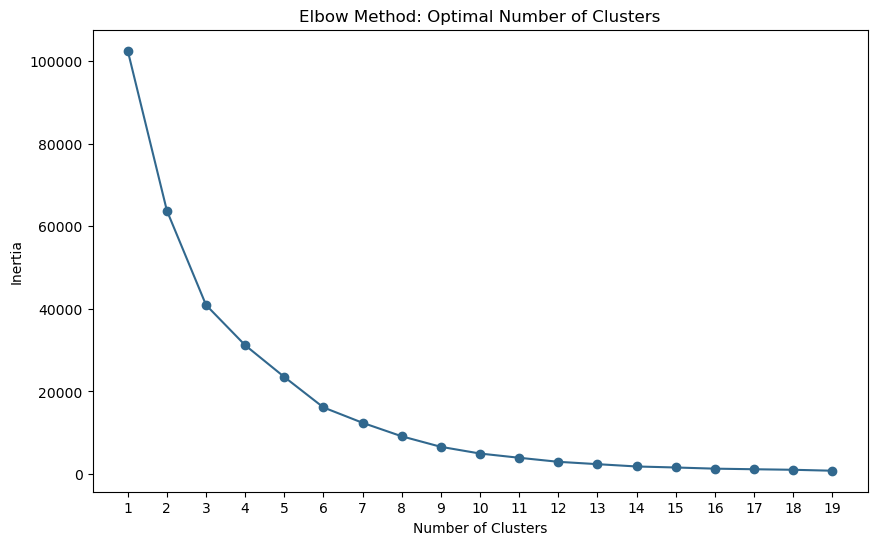

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
# Separate numerical and categorical columns
numerical_features = df[['Nameplate Capacity (in KW AC)']]
categorical_features = df[['County_Population_Category', 'Utility']]

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(categorical_features)

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_features)

# Combine the scaled numerical features and the encoded categorical features
combined_features = np.hstack([scaled_numerical, encoded_categorical])

# KMeans clustering with the combined features
inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

In [ ]:
# Pick optimal number of pitchers from plot above
optimal_k = 8
# Cluster pitchers by their average values
kmeans = KMeans(n_clusters = optimal_k)
df['cluster'] = kmeans.fit_predict(combined_features)


c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Model

### Taking the class with minimum value

In [ ]:
target='Fuel Type'
df = df.groupby(target, group_keys=False)
df = pd.DataFrame(df.apply(lambda x: x.sample(df.size().min()))).reset_index()
df['Fuel Type'].value_counts()


Fuel Type
Battery                                   166
Electric Grid                             166
Electric Grid_ Onsite Renewable_ Solar    166
Electric Grid_ Solar                      166
Onsite Renewable_ Solar                   166
Solar PV                                  166
Solar PV & Battery                        166
Name: count, dtype: int64

In [ ]:
df

,index,Utility,Nameplate Capacity (in KW AC),Fuel Type,Facility City,County,CAISO Flag,Facility Zip,Customer Sector,Approval Date,County_Population_Category,Up_to_date_approvals_utility,Most Frequent Prior Fuel Type,cluster
0,29802,Southern California Edison,10.0,Battery,Corona Del Mar,Orange,OTHER,92625,Residential,2023-11-20,Very high population,45850,Battery,0
1,44733,Southern California Edison,5.0,Battery,Ventura,Ventura,OTHER,93004,Residential,2023-09-06,High population,39871,Battery,0
2,21710,San Diego Gas & Electric,10.0,Battery,San Diego,San Diego,OTHER,92130,Residential,2022-05-23,Very high population,13306,Battery,4
3,8558,Southern California Edison,7.0,Battery,Culver City,Los Angeles,OTHER,90230,Residential,2023-09-11,Very high population,40108,Battery,0
4,20532,Southern California Edison,7.6,Battery,Gardena,Los Angeles,OTHER,90249,Residential,2021-06-22,Very high population,15128,Battery,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,6389,Modesto Irrigation District,5.0,Solar PV & Battery,Modesto,Stanislaus,OTHER,95357,Residential,2021-04-28,Medium population,107,Solar PV & Battery,5
1158,2173,City of Glendale,5.0,Solar PV & Battery,Glendale,Los Angeles,OTHER,91201,Residential,2022-11-10,Very high population,104,Solar PV & Battery,7
1159,30530,City of Glendale,5.0,Solar PV & Battery,Glendale,Los Angeles,OTHER,91201,Residential,2023-06-28,Very high population,143,Solar PV & Battery,7
1160,36486,Modesto Irrigation District,5.0,Solar PV & Battery,Modesto,Stanislaus,OTHER,95356,Residential,2018-03-22,Medium population,5,Solar PV & Battery,5


Selecting Target and Explanatory Variables

In [ ]:
# Automatically select all columns except 'pitch_type'
# Select features (X) and the target variable (y) using the filtered columns
X = df.loc[:,['cluster', 'Utility']]
y = df['Fuel Type']

In [ ]:
encoder = OneHotEncoder(sparse=False)
X = encoder.fit_transform(X.values)
X.shape



c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



(1162, 18)

In [ ]:
y = encoder.fit_transform(y.values.reshape(-1, 1)).argmax(axis=1)

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Separating Training and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
 X,
 y,
 test_size=0.2,
 random_state=4
)


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Lasso (L1) Regularization with Cross-Validation
model = LogisticRegressionCV(
 Cs=10, # Number of regularization strengths to test
 cv=5, # 5-fold cross-validation
 penalty='l1', # Lasso (L1) regularization
 solver='liblinear', # L1 requires liblinear solver
 max_iter=100,
 scoring='accuracy', # Use accuracy to choose the best model
 random_state=42
)
# Fit the model with cross-validation
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy: 0.57
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.22      1.00      0.36        29
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        32
           5       1.00      0.79      0.89        39
           6       1.00      1.00      1.00        32

    accuracy                           0.57       233
   macro avg       0.46      0.54      0.46       233
weighted avg       0.50      0.57      0.50       233



c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.22      1.00      0.36        29
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        32
           5       1.00      0.79      0.89        39
           6       1.00      1.00      1.00        32

    accuracy                           0.57       233
   macro avg       0.46      0.54      0.46       233
weighted avg       0.50      0.57      0.50       233



c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



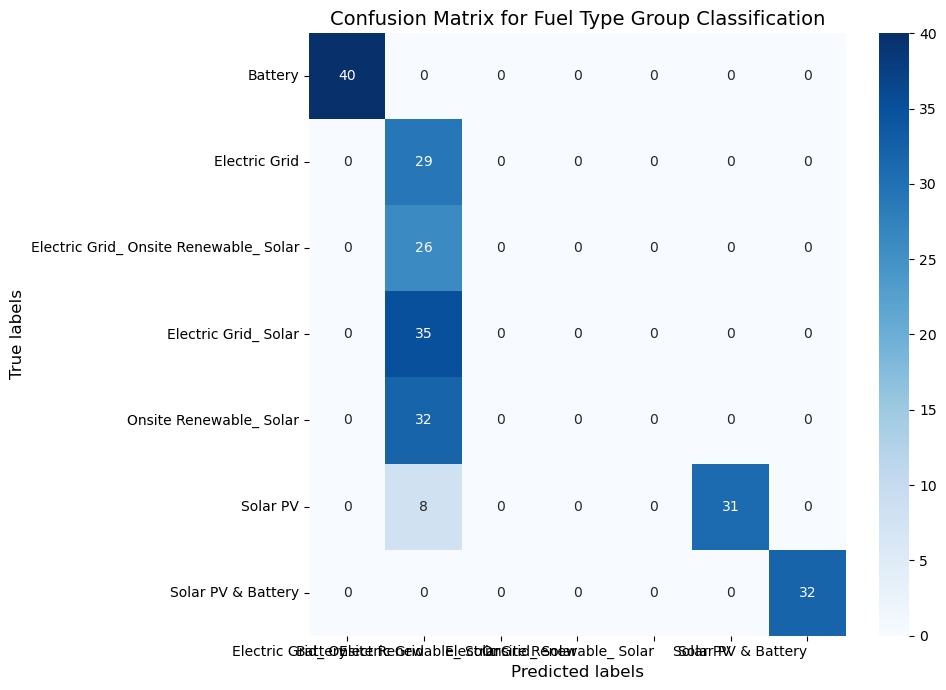

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test_encoded and y_pred are already defined
# Generate a classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique pitch types to label the confusion matrix
pitch_types = encoder.categories_[0]  # This will give the pitch type names

# Convert confusion matrix to a DataFrame for better readability
cm_df = pd.DataFrame(cm, index=pitch_types, columns=pitch_types)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')  # fmt='g' ensures integer format

# Add labels, title, and ticks
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('True labels', fontsize=12)
ax.set_title('Confusion Matrix for Fuel Type Group Classification', fontsize=14)

# Set tick labels for x and y axis using the pitch type names
ax.xaxis.set_ticklabels(pitch_types, rotation=0, ha="right", fontsize=10)
ax.yaxis.set_ticklabels(pitch_types, rotation=0, fontsize=10)  # Keep vertical

plt.tight_layout()  # Adjust layout to fit labels
plt.show()


c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\U355394\New folder\envs\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 0.5708
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.31      0.55      0.40        29
           2       0.20      0.62      0.30        26
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        32
           5       1.00      0.79      0.89        39
           6       0.94      1.00      0.97        32

    accuracy                           0.57       233
   macro avg       0.49      0.56      0.50       233
weighted avg       0.53      0.57      0.53       233



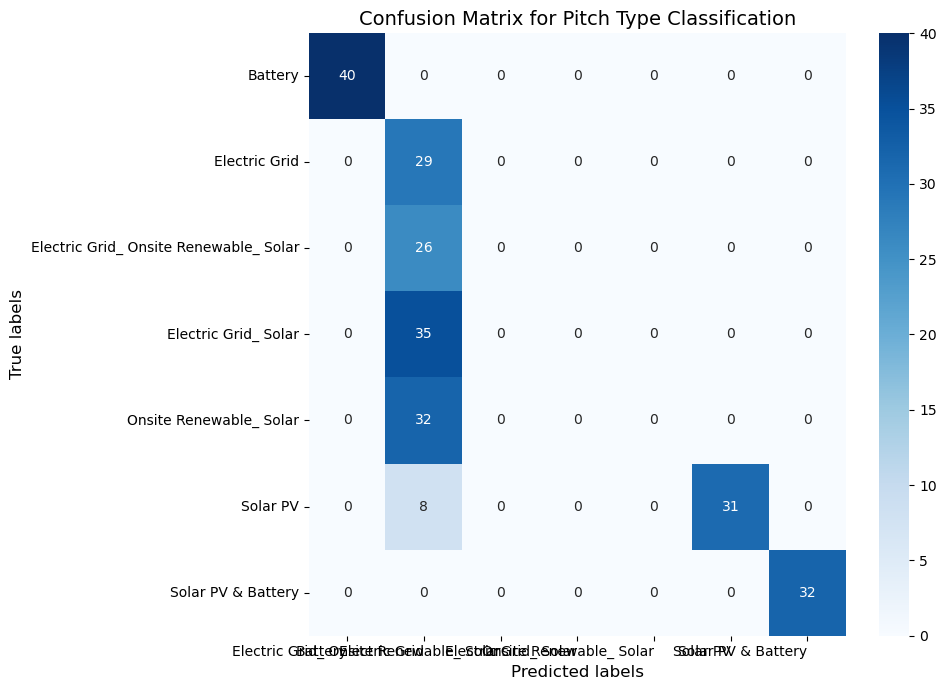

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier with additional parameters
rf_classifier = RandomForestClassifier(
 n_estimators=100, # Number of trees In [218…
 max_depth=100, # Maximum depth of the tree
 min_samples_split=8, # Minimum samples to split a node
 min_samples_leaf=16, # Minimum samples at a leaf node
 max_features=0.25, # Number of features to consider for best split
 bootstrap=True, # Use bootstrap samples
 criterion="gini", # Use Gini impurity to split
 random_state=42
)
# Train the classifier
rf_classifier.fit(x_train, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Generate a classification report
print(f"Accuracy: {accuracy:.4f}")
print(classification_rep)
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g') # fmt='g' ensure
# Add labels, title, and ticks
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('True labels', fontsize=12)
ax.set_title('Confusion Matrix for Pitch Type Classification', fontsize=14)
# Set tick labels for x and y axis using the pitch type names
ax.xaxis.set_ticklabels(pitch_types, rotation=0, ha="right", fontsize=10) #
ax.yaxis.set_ticklabels(pitch_types, rotation=0, fontsize=10) # Keep vertic
plt.tight_layout() # Adjust layout to fit labels
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': x_train.columns,  # Column names of your features
    'Importance': rf_classifier.feature_importances_
})

# Extract prefix (before the last '_') and group the importance values by the prefix
feature_importances_df['Prefix'] = feature_importances_df['Feature'].apply(lambda x: '_'.join(x.split('_')[:-1]))

# Group by the prefix and sum the importances
grouped_importances_df = feature_importances_df.groupby('Prefix')['Importance'].sum().reset_index()

feature_importances_df


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Find feature importance:

Feature Importances DataFrame:
                         Feature  Importance
0           Cumulative Approvals    0.173878
1                   Facility Zip    0.111702
2  Nameplate Capacity (in KW AC)    0.040588
3                        cluster    0.030185
4                          index    0.031429
Feature Importances with Prefixes:
                         Feature  Importance                         Prefix
0           Cumulative Approvals    0.173878           Cumulative Approvals
1                   Facility Zip    0.111702                   Facility Zip
2  Nameplate Capacity (in KW AC)    0.040588  Nameplate Capacity (in KW AC)
3                        cluster    0.030185                        cluster
4                          index    0.031429                          index
Grouped Feature Importances:
                           Prefix  Importance
7   Most Frequent Prior Fuel Type    0.343714
9                         Utility    0.226231
3            Cumulative Approvals    0.17

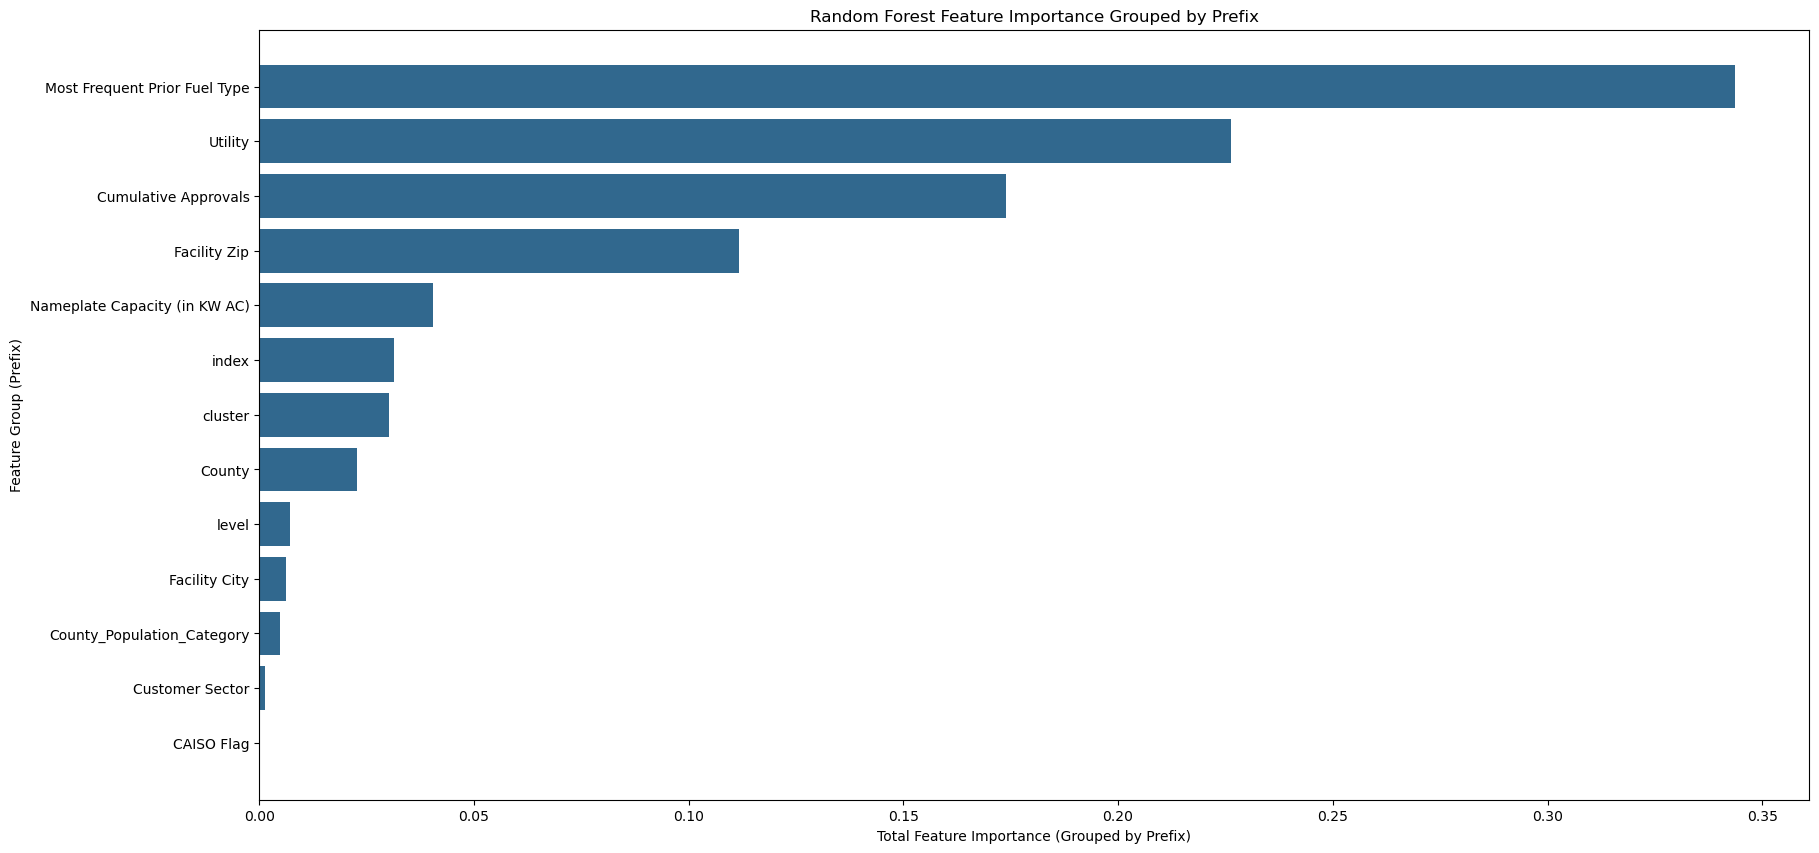

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': x_train.columns,  # Column names of your features
    'Importance': rf_classifier.feature_importances_
})

# Check if the DataFrame is created correctly
print("Feature Importances DataFrame:")
print(feature_importances_df.head())

# Extract prefix (before the last '_') and if no prefix exists, keep the feature name as-is
feature_importances_df['Prefix'] = feature_importances_df['Feature'].apply(
    lambda x: '_'.join(x.split('_')[:-1]) if '_' in x else x
)

# Check if the prefixes are created correctly
print("Feature Importances with Prefixes:")
print(feature_importances_df.head())

# Group by the prefix and sum the importances
grouped_importances_df = feature_importances_df.groupby('Prefix')['Importance'].sum().reset_index()

# Sort the grouped importances by descending order
grouped_importances_df = grouped_importances_df.sort_values(by='Importance', ascending=False)

# Display the grouped feature importance
print("Grouped Feature Importances:")
print(grouped_importances_df)

# Plot the grouped feature importances
plt.figure(figsize=(20, 10))
plt.barh(grouped_importances_df['Prefix'], grouped_importances_df['Importance'])
plt.xlabel('Total Feature Importance (Grouped by Prefix)')
plt.ylabel('Feature Group (Prefix)')
plt.title('Random Forest Feature Importance Grouped by Prefix')

plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()
